In [1]:
%%bash
gdown 1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU

Downloading...
From: https://drive.google.com/uc?id=1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU
To: /content/ads.csv
100%|██████████| 4.76k/4.76k [00:00<00:00, 19.1MB/s]


In [2]:
import pandas as pd

# First Load the csv file.

In [3]:
df = pd.read_csv('ads.csv')

In [11]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# Lets check if there is any null values.

In [6]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

- There in no null values

# Column `Unnamed: 0` is irrelavant ot the column sales so lets drop the column.

In [9]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [12]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


- The column `Unnamed: 0` has been successfully dropped.

# Check the between dependent and independent variable.
- Dependent: Sales
- Independent: TV, radio, newspaper

# Lets Select dependent variable using feature selection technique.

In [13]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


- Lets see the heatmap of correlation between dependent and independent variable.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

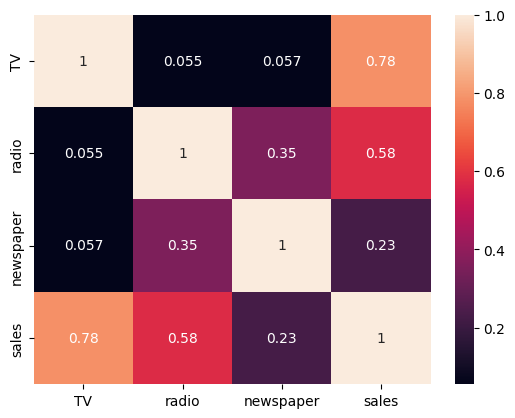

In [15]:
sns.heatmap(df.corr(), annot = True)
plt.show()

- Here sales is positively correlated with TV by 0.78.
- Here sales is positively correlated with radio by 0.58.
- Here sales is positively correlated with newspaper by 0.23.


# So, we will use TV as our dependent variable because it has the highest correlation with sales amongst all.

In [33]:
X = df[['TV']]
Y = df.iloc[ : , -1]

# Now lets get started with train test split.

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [36]:
X_train.shape, Y_train.shape

((160, 1), (160,))

In [37]:
X_test.shape, Y_test.shape

((40, 1), (40,))

# Here the `Target Column(Sales)` has continuous values so we will use `Linear Regression`

# Lets make a Linear Regression model now.

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

# Now the Evaluation part.

# I am going to use `Mean Squared Error(MSE)`, `Mean Absolute Error(MAE)`, `r2 score` and `Root Mean Absolute Error(RMSE)`.

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [41]:
MSE = mean_squared_error(Y_test, Y_pred)

- Mean square error is calculated by taking the average, specifically the mean, of errors squared from data as it relates to a function.

In [42]:
MAE = mean_absolute_error(Y_test, Y_pred)

- Mean Absolute Error is the magnitude of difference between the prediction of an observation and the true value of that observation.

In [43]:
r2 = r2_score(Y_test, Y_pred)

- r2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

In [44]:
RMSE = mean_squared_error(Y_test, Y_pred, squared = False)

- Root Mean Squared Error is the root of Mean Squared Error.

In [45]:
print(f'''The Mean Squared Error of Single Linear Regression is: {MSE}
The Mean Absolute Error of Single Linear Regression is: {MAE}
The r2 score of Single Linear Regression is: {r2}
The Root Mean Squared Error of Single Linear Regression is: {RMSE}''')

The Mean Squared Error of Single Linear Regression is: 10.204654118800956
The Mean Absolute Error of Single Linear Regression is: 2.444420003751042
The r2 score of Single Linear Regression is: 0.6766954295627076
The Root Mean Squared Error of Single Linear Regression is: 3.194472431998898


# Now Multiple Linear Regression

In [46]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [47]:
X = df.iloc[ : , : -1]
Y = df['sales']

# Now lets do train test split again.

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [49]:
X_train.shape, Y_train.shape

((160, 3), (160,))

In [51]:
X_test.shape, Y_test.shape

((40, 3), (40,))

# Lets make a Linear Regression model again.

In [52]:
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

# Now again the Evaluation part.
# I am again going to use `Mean Squared Error(MSE)`, `Mean Absolute Error(MAE)`, `r2 score` and `Root Mean Absolute Error(RMSE)`.

In [53]:
MSE = mean_squared_error(Y_test, Y_pred)

In [54]:
MAE = mean_absolute_error(Y_test, Y_pred)

In [55]:
r2 = r2_score(Y_test, Y_pred)

In [56]:
RMSE = mean_squared_error(Y_test, Y_pred, squared = False)

In [57]:
print(f'''The Mean Squared Error of Multiple Linear Regression is: {MSE}
The Mean Absolute Error of Multiple Linear Regression is: {MAE}
The r2 score of Multiple Linear Regression is: {r2}
The Root Mean Squared Error of Multiple Linear Regression is: {RMSE}''')

The Mean Squared Error of Multiple Linear Regression is: 3.1740973539761033
The Mean Absolute Error of Multiple Linear Regression is: 1.4607567168117603
The r2 score of Multiple Linear Regression is: 0.899438024100912
The Root Mean Squared Error of Multiple Linear Regression is: 1.78159966153345


# There are less errors and higher score in Multiple Linear Regression so, we can prefer Multiple Linear regression.

# Now lets store the model using pickle for using it in the WebApp for predicting the sales.

In [58]:
import pickle

with open('sales_predictor.pickle', 'wb') as file:
    pickle.dump(model, file)